<a href="https://colab.research.google.com/github/charujhagrawat20/StackIt/blob/main/Prac4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Training Perceptron (Epochs: 50, Rate: 0.1) ---
✅ Converged successfully at Epoch 7.

--- Training Complete ---
Final Weights: [0.22183303 0.13147392]
Final Bias: -0.3114

--- Testing Model Predictions ---
Input: [0 0], Predicted: 0, Expected: 0 (Correct)
Input: [0 1], Predicted: 0, Expected: 0 (Correct)
Input: [1 0], Predicted: 0, Expected: 0 (Correct)
Input: [1 1], Predicted: 1, Expected: 1 (Correct)


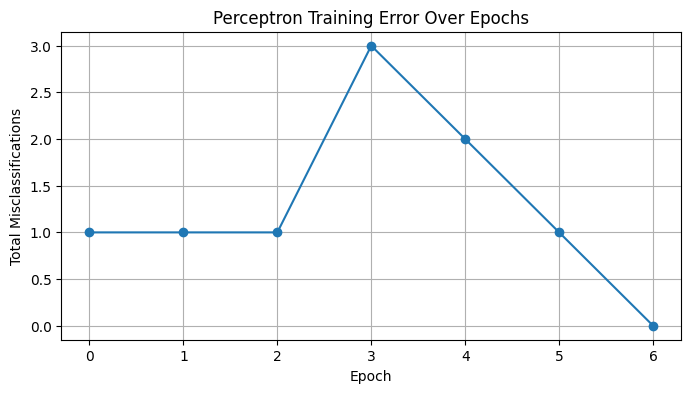

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def step_function(weighted_sum):
    return 1 if weighted_sum >= 0 else 0
class Perceptron:
    def __init__(self, num_inputs, learning_rate=0.1, max_epochs=100):
        self.weights = np.random.uniform(low=-0.5, high=0.5, size=num_inputs)
        self.bias = np.random.uniform(low=-0.5, high=0.5, size=1)
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.errors = []
    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return step_function(weighted_sum)
    def train(self, training_inputs, labels):
        print(f"--- Training Perceptron (Epochs: {self.max_epochs}, Rate: {self.learning_rate}) ---")
        for epoch in range(self.max_epochs):
            total_error = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                total_error += abs(error)
                if error != 0:
                    self.weights += self.learning_rate * error * inputs
                    self.bias += self.learning_rate * error * 1 # Bias update
            self.errors.append(total_error)
            if total_error == 0:
                print(f"✅ Converged successfully at Epoch {epoch + 1}.")
                break
            if (epoch + 1) % 10 == 0:
                 print(f"Epoch {epoch + 1}/{self.max_epochs}, Total Error: {total_error}")
        print("\n--- Training Complete ---")
        print(f"Final Weights: {self.weights}")
        print(f"Final Bias: {self.bias[0]:.4f}")
X_train = np.array([
    [0, 0], # Input 1
    [0, 1], # Input 2
    [1, 0], # Input 3
    [1, 1]  # Input 4
])
y_train = np.array([0, 0, 0, 1])
perceptron = Perceptron(num_inputs=X_train.shape[1], learning_rate=0.1, max_epochs=50)
perceptron.train(X_train, y_train)
print("\n--- Testing Model Predictions ---")
test_cases = X_train
test_labels = y_train
for inputs, expected in zip(test_cases, test_labels):
    prediction = perceptron.predict(inputs)
    status = "Correct" if prediction == expected else "Incorrect"
    print(f"Input: {inputs}, Predicted: {prediction}, Expected: {expected} ({status})")
plt.figure(figsize=(8, 4))
plt.plot(perceptron.errors, marker='o')
plt.title('Perceptron Training Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Total Misclassifications')
plt.grid(True)
plt.show()